# AutoML: TPOT Tutorial

<img alt="TPOT Logo" src="tpot_logo.jpg" align="left" style="width: 250px;">

Here's a link to the docs - https://epistasislab.github.io/tpot/.

## Introduction to TPOT

### Default Parameters

<code>generations=100, 
population_size=100, 
offspring_size=None  # Jeff notes this gets set to population_size
mutation_rate=0.9, 
crossover_rate=0.1, 
scoring="Accuracy",  # for Classification
cv=5, 
subsample=1.0, 
n_jobs=1,
max_time_mins=None, 
max_eval_time_mins=5,
random_state=None, 
config_dict=None,
warm_start=False, 
memory=None,
periodic_checkpoint_folder=None, 
early_stop=None
verbosity=0
disable_update_check=False
</code>

### Important Parameters

generations: int, optional (default: 100)           
Number of iterations to the run pipeline optimization process.            Generally, TPOT will work better when you give it more generations(and therefore time) to optimize the pipeline. 
TPOT will evaluate POPULATION_SIZE + GENERATIONS x OFFSPRING_SIZE pipelines in total (emphasis mine).
population_size: int, optional (default: 100)            
Number of individuals to retain in the GP population every generation. 
Generally, TPOT will work better when you give it more individuals (and therefore time) to optimize the pipeline. 
offspring_size: int, optional (default: None)
Number of offspring to produce in each GP generation.            
By default, offspring_size = population_size.

### Classifiers Used (with Parameters chosen from)

‘sklearn.naive_bayes.BernoulliNB’: { ‘alpha’: [1e-3, 1e-2, 1e-1, 1., 10., 100.], ‘fit_prior’: [True, False] }, 
‘sklearn.naive_bayes.MultinomialNB’: { ‘alpha’: [1e-3, 1e-2, 1e-1, 1., 10., 100.], ‘fit_prior’: [True, False] }, 
‘sklearn.tree.DecisionTreeClassifier’: { ‘criterion’: [“gini”, “entropy”], ‘max_depth’: range(1, 11), ‘min_samples_split’: range(2, 21), ‘min_samples_leaf’: range(1, 21) }, 
‘sklearn.ensemble.ExtraTreesClassifier’: { ‘n_estimators’: [100], ‘criterion’: [“gini”, “entropy”], ‘max_features’: np.arange(0.05, 1.01, 0.05), ‘min_samples_split’: range(2, 21), ‘min_samples_leaf’: range(1, 21), ‘bootstrap’: [True, False] },
‘sklearn.ensemble.RandomForestClassifier’: { ‘n_estimators’: [100], ‘criterion’: [“gini”, “entropy”], ‘max_features’: np.arange(0.05, 1.01, 0.05), ‘min_samples_split’: range(2, 21), ‘min_samples_leaf’: range(1, 21), ‘bootstrap’: [True, False] }, 
‘sklearn.ensemble.GradientBoostingClassifier’: { ‘n_estimators’: [100], ‘learning_rate’: [1e-3, 1e-2, 1e-1, 0.5, 1.], ‘max_depth’: range(1, 11), ‘min_samples_split’: range(2, 21), ‘min_samples_leaf’: range(1, 21), ‘subsample’: np.arange(0.05, 1.01, 0.05), ‘max_features’: np.arange(0.05, 1.01, 0.05) },
‘sklearn.neighbors.KNeighborsClassifier’: { ‘n_neighbors’: range(1, 101), ‘weights’: [“uniform”, “distance”], ‘p’: [1, 2] }, 
‘sklearn.svm.LinearSVC’: { ‘penalty’: [“l1”, “l2”], ‘loss’: [“hinge”, “squared_hinge”], ‘dual’: [True, False], ‘tol’: [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], ‘C’: [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.] }, 
‘sklearn.linear_model.LogisticRegression’: { ‘penalty’: [“l1”, “l2”], ‘C’: [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.], ‘dual’: [True, False] }, 
‘xgboost.XGBClassifier’: { ‘n_estimators’: [100], ‘max_depth’: range(1, 11), ‘learning_rate’: [1e-3, 1e-2, 1e-1, 0.5, 1.], ‘subsample’: np.arange(0.05, 1.01, 0.05), ‘min_child_weight’: range(1, 21), ‘nthread’: [1] }

And TPOT can stack classifiers, including the same classifier multiple times. One of the core developers of TPOT explains how it works in this issue:
The pipeline ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, True, 'entropy', 0.10000000000000001, 13, 6), True, 'gini', 0.75, 17, 4) does the following:
Fit all of the original features using an ExtraTreesClassifier
Take the predictions from that ExtraTreesClassifier and create a new feature using those predictions
Pass the original features plus the new “predicted feature” to the 2nd ExtraTreesClassifier and use its predictions as the final predictions of the pipeline
This process is called stacking classifiers, which is a fairly common tactic in machine learning.

### Preprocessors Used

```‘sklearn.preprocessing.Binarizer’: { ‘threshold’: np.arange(0.0, 1.01, 0.05) }, 
‘sklearn.decomposition.FastICA’: { ‘tol’: np.arange(0.0, 1.01, 0.05) }, 
‘sklearn.cluster.FeatureAgglomeration’: { ‘linkage’: [‘ward’, ‘complete’, ‘average’], ‘affinity’: [‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘cosine’] }, 
‘sklearn.preprocessing.MaxAbsScaler’: { }, 
‘sklearn.preprocessing.MinMaxScaler’: { }, 
‘sklearn.preprocessing.Normalizer’: { ‘norm’: [‘l1’, ‘l2’, ‘max’] }, 
‘sklearn.kernel_approximation.Nystroem’: { ‘kernel’: [‘rbf’, ‘cosine’, ‘chi2’, ‘laplacian’, ‘polynomial’, ‘poly’, ‘linear’, ‘additive_chi2’, ‘sigmoid’], ‘gamma’: np.arange(0.0, 1.01, 0.05), ‘n_components’: range(1, 11) }, 
‘sklearn.decomposition.PCA’: { ‘svd_solver’: [‘randomized’], ‘iterated_power’: range(1, 11) }, ‘sklearn.preprocessing.PolynomialFeatures’: { ‘degree’: [2], ‘include_bias’: [False], ‘interaction_only’: [False] }, 
‘sklearn.kernel_approximation.RBFSampler’: { ‘gamma’: np.arange(0.0, 1.01, 0.05) }, ‘sklearn.preprocessing.RobustScaler’: { }, 
‘sklearn.preprocessing.StandardScaler’: { }, ‘tpot.builtins.ZeroCount’: { }, 
‘tpot.builtins.OneHotEncoder’: { ‘minimum_fraction’: [0.05, 0.1, 0.15, 0.2, 0.25], ‘sparse’: [False] } (emphasis mine)```

## Imports

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from scipy import stats

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, average_precision_score, balanced_accuracy_score

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv

Set plot parameters

In [44]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Custom Functions

In [45]:
def my_errors(model, X_test, y_test, skl_api = False):
    if skl_api:
        probs = model.predict_proba(X_test)
    else:
        probs = model.predict(X_test)
    preds = np.asarray([np.argmax(line) for line in probs])
    print("Average Precision Score: {}".format(average_precision_score(y_test, preds)))
    print("Balanced Accuracy Score: {}".format(balanced_accuracy_score(y_test, preds)))
    return probs, preds

In [46]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)
    cm_perc = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm_perc.index.name = 'Actual'
    cm_perc.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_perc, annot=annot, fmt='', ax=ax, square = True, cmap = 'PuBu', cbar_kws = {'label':'Percentage'}, vmin = 0, vmax = 100) # Change cm_perc to cm if coloring is by %
    
    #!!UNCOMMENT if your mpl is not updated (if cm_analysis output is not square)
#     # fix for mpl bug that cuts off top/bottom of seaborn viz
#     b, t = plt.ylim() # discover the values for bottom and top
#     b += 0.5 # Add 0.5 to the bottom
#     t -= 0.5 # Subtract 0.5 from the top
#     plt.ylim(b, t) # update the ylim(bottom, top) values
    
    plt.show()

## Heart Disease Data

We'll be using the Heart Disease Data Set from the UCI Machine Learning Repository, accessed through Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci). It has a lot of categorical features, so we'll be able to make good use of CatBoost. The downside is there are only 303 samples.

Let's load the data and look at the columns and the head

In [47]:
folder = r"C:\Users\ponglao\OneDrive - savvysherpa.com\Dev Group\heartdisease"
data = pd.read_csv(folder + '\\heart.csv')
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here's a description of the columns:
1. `age` (int)
1. `sex` (cat)<br>
0 = femaile, 1 = male
1. `cp` (cat) - chest pain type<br>
0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina
1. `trestbps` (int) - resting blood pressure
1. `chol` (int) - blood serum cholesterol
1. `fbs` (cat) - if fasting blood sugar is > 120 mg/dl<br>
0 = False, 1 = True
1. `restecg` (cat) - resting electrocardiographic results<br>
0 = probable/definite left ventricular hypertrophy, 1 = normal, 2 = having ST-T wave abnormality
1. `thalach` (int) - maximum heart rate achieved
1. `exang` (cat) - exercise induced angina<br>
0 = no, 1 = yes
1. `oldpeak` (float) - ST depression (a finding on an electrocardiogram) induced by exercise relative to rest
1. `slope`(cat) - slope of the peak exercise ST segment<br>
0 = downsloping, 1 = flat, 2 = upsloping
1. `ca` (int) - number of major vessels colored by fluoroscopy
1. `thal` (cat) - blood flow measurement using thallium<br>
0 = null, 1 = fixed defect, 2 = normal, 3 = reversible defect
1. `target` (cat) - **indicator of NO heart disease**<br>
0 = disease, 1 = no disease

The following links helped me understand the columns better:
- https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877
- https://www.kaggle.com/ronitf/heart-disease-uci/discussion/92838

Let's check the distribution of `target`

In [49]:
df1 = data.target.value_counts().rename('Count')
df2 = (data.target.value_counts(normalize = True)*100).rename('Percent')
pd.concat([df1,df2], axis = 1).style.format({'Percent':'{:.2f}%'})

,Count,Percent
1,165,54.46%
0,138,45.54%


Specify the categorical columns and perform one-hot encoding

In [50]:
cat_features = ['sex','cp','fbs','restecg','exang','slope', 'thal'] #list down the cat column names
data = pd.get_dummies(data, columns=cat_features)
data = data.loc[:,[col for col in data.columns if col != 'target']+['target']]
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,56,120,236,178,0.8,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
4,57,120,354,163,0.6,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1


Separate the data into X (features) and y (class/target)

In [51]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Split the data into train and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1010, stratify = y)

## TPOT Modeling

### Basics

The model object is `TPOTClassifier` <br>

In [54]:
from tpot import TPOTClassifier

Below, we create a TPOTClassifier object. Note that the default `generations` and `population_size` are both 100. We set `generations = 20` so that the model fits quickly, and `verbosity = 2` to see CV scores at every generation. We also set `config_dict = 'TPOT light'` for it to run fast.

#### TPOT Light

In [86]:
model = TPOTClassifier(generations = 100, 
                       population_size = 100, 
                       config_dict = 'TPOT light',
                       verbosity = 1, 
                       random_state = 2020, 
                       n_jobs = -1)
model.fit(X_train, y_train)

Best pipeline: LogisticRegression(MultinomialNB(CombineDFs(MinMaxScaler(input_matrix), Binarizer(GaussianNB(SelectPercentile(input_matrix, percentile=61)), threshold=0.5)), alpha=0.001, fit_prior=False), C=5.0, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=<ipykernel.iostream.OutStream object at 0x0000021D5F3FCEC8>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=2020, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=1, warm_start=False)

Below, I run some metrics/plots to check model performance. <br>
The model performs pretty well, but maybe we can make it better.

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('minmaxscaler',
                                                 MinMaxScaler(copy=True,
                                                              feature_range=(0,
                                                                             1))),
                                                ('pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('selectpercentile',
                                                                  SelectPercentile(percentile=61,
                                                                                   score_func=<function f_classif at 0x0000021D7B6DE5E8>)),
                                                                 ('stackingestimator',
                                                          

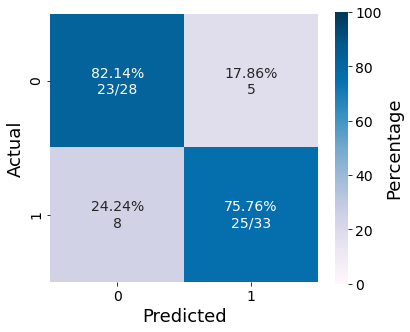

In [87]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

print(model.fitted_pipeline_)
print('Model score on training data: {}'.format(model.score(X_test, y_test)))

my_errors(model, X_test, y_test, skl_api = True)
cm_analysis(y_test, preds_class, labels = [0,1], ymap=None, figsize=(6,5))

#### TPOT (Regular)

In [88]:
model = TPOTClassifier(generations = 20, 
                       population_size = 100, 
                       verbosity = 2, 
                       random_state = 2020, 
                       n_jobs = -1)
model.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8428571428571429
Generation 2 - Current best internal CV score: 0.843027210884354
Generation 3 - Current best internal CV score: 0.8471088435374149
Generation 4 - Current best internal CV score: 0.8471088435374149
Generation 5 - Current best internal CV score: 0.8471088435374149
Generation 6 - Current best internal CV score: 0.8636054421768706
Generation 7 - Current best internal CV score: 0.8636054421768706
Generation 8 - Current best internal CV score: 0.8636054421768706
Generation 9 - Current best internal CV score: 0.8636054421768706
Generation 10 - Current best internal CV score: 0.8636054421768706
Generation 11 - Current best internal CV score: 0.8636054421768706
Generation 12 - Current best internal CV score: 0.8676020408163264
Generation 13 - Current best internal CV score: 0.8676020408163264
Generation 14 - Current best internal CV score: 0.8676020408163264
Generation 15 - Current best internal CV score: 0.8676020408163264
Gener

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=20,
               log_file=<ipykernel.iostream.OutStream object at 0x0000021D5F3FCEC8>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=2020, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

Below, I run some metrics/plots to check model performance. <br>
The model performs pretty well, but maybe we can make it better.

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=LogisticRegression(C=0.01,
                                                                class_weight=None,
                                                                dual=False,
                                                                fit_intercept=True,
                                                                intercept_scaling=1,
                                                                l1_ratio=None,
                                                                max_iter=100,
                                                                multi_class='auto',
                                                                n_jobs=None,
                                                                penalty='l2',
                                                                random_state=2020,
                                                             

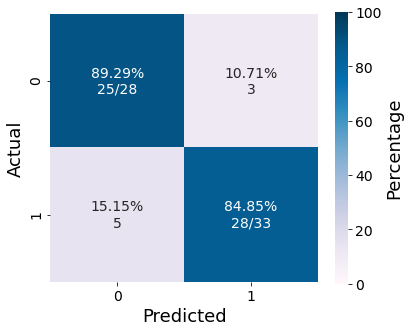

In [89]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

print(model.fitted_pipeline_)
print('Model score on training data: {}'.format(model.score(X_test, y_test)))

my_errors(model, X_test, y_test, skl_api = True)
cm_analysis(y_test, preds_class, labels = [0,1], ymap=None, figsize=(6,5))

## Credit Card Fraud Data

Load the data and look at classes

In [16]:
folder = r"C:\Users\ponglao\OneDrive - savvysherpa.com\Dev Group\creditcard"
data = pd.read_csv(folder + '\\creditcard.csv')
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

We have an imbalanced dataset

In [17]:
df1 = data.Class.value_counts().rename('Count')
df2 = (data.Class.value_counts(normalize = True)*100).rename('Percent')
pd.concat([df1,df2], axis = 1).style.format({'Percent':'{:.2f}%'})

,Count,Percent
0,284315,99.83%
1,492,0.17%


Separate the data into X and y

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Split the data into train and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020, stratify = y)

#### Balanced Accuracy

In [20]:
model = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2, random_state = 2020, scoring = 'balanced_accuracy')
model.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9003293042693749
Generation 2 - Current best internal CV score: 0.9003293042693749
Generation 3 - Current best internal CV score: 0.9003293042693749
Generation 4 - Current best internal CV score: 0.9046181395366582
Generation 5 - Current best internal CV score: 0.9046181395366582

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000001C427F0DC08>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=2020, scoring='balanced_accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [21]:
model.score(X_test, y_test)

0.9335151970185935

In [22]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

In [23]:
model.fitted_pipeline_

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=9, min_samples_split=4,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=2020,
                                        splitter='best'))],
         verbose=False)

Below, I run some metrics/plots to check model performance. <br>
The model performs pretty well, but maybe we can make it better.

Average Precision Score: 0.7159999679150948
Balanced Accuracy Score: 0.9335151970185935


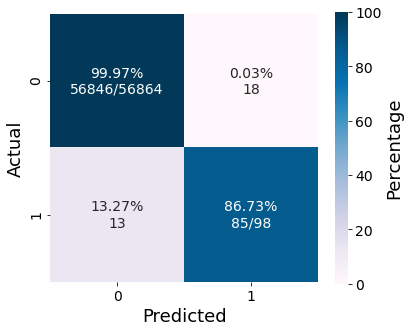

In [24]:
my_errors(model, X_test, y_test, skl_api = True)
cm_analysis(y_test, preds_class, labels = [0,1], ymap=None, figsize=(6,5))

#### Average Precision

In [25]:
model = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2, random_state = 2020, scoring = 'average_precision', config_dict='TPOT light')
model.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.747943806653492
Generation 2 - Current best internal CV score: 0.747943806653492
Generation 3 - Current best internal CV score: 0.7774239900153754
Generation 4 - Current best internal CV score: 0.778912016083946
Generation 5 - Current best internal CV score: 0.778912016083946

Best pipeline: BernoulliNB(Binarizer(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=5, min_samples_leaf=17, min_samples_split=2), threshold=0.9500000000000001), alpha=0.001, fit_prior=False)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000001C427F0DC08>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=2020, scoring='average_precision', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [26]:
model.score(X_test, y_test)

0.8268220819127601

In [27]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

In [28]:
model.fitted_pipeline_

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                    class_weight=None,
                                                                    criterion='entropy',
                                                                    max_depth=5,
                                                                    max_features=None,
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                                    min_samples_leaf=17,
                                                                    min_samples_split=2,
                                                          

Below, I run some metrics/plots to check model performance. <br>
The model performs pretty well, but maybe we can make it better.

Average Precision Score: 0.18903099353813888
Balanced Accuracy Score: 0.9410462341942967


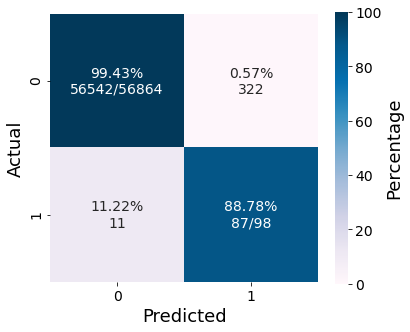

In [29]:
my_errors(model, X_test, y_test, skl_api = True)
cm_analysis(y_test, preds_class, labels = [0,1], ymap=None, figsize=(6,5))

##### TPOT regular

In [30]:
model = TPOTClassifier(generations = 5,
                       population_size = 20,
                       verbosity = 2,
                       random_state = 2020,
                       scoring = 'average_precision')
model.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8320930573247601
Generation 2 - Current best internal CV score: 0.838138177802826
Generation 3 - Current best internal CV score: 0.838138177802826
Generation 4 - Current best internal CV score: 0.8459890878701266
Generation 5 - Current best internal CV score: 0.8459890878701266

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=4, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000001C427F0DC08>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=2020, scoring='average_precision', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [31]:
model.score(X_test, y_test)

0.9012200000362519

In [32]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

In [33]:
model.fitted_pipeline_

Pipeline(memory=None,
         steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None,
                                      max_features=0.7500000000000001,
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=4,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=2020,
                                      verbose=0, warm_start=False))],
         verbose=False)

Below, I run some metrics/plots to check model performance. <br>
The model performs pretty well, but maybe we can make it better.

Average Precision Score: 0.8272741377720991
Balanced Accuracy Score: 0.9234518019363063


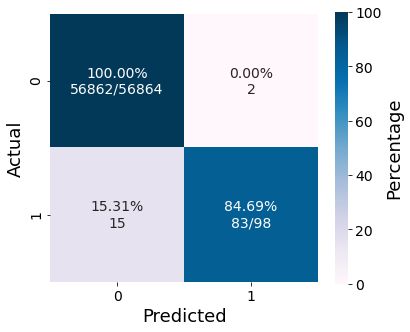

In [34]:
my_errors(model, X_test, y_test, skl_api = True)
cm_analysis(y_test, preds_class, labels = [0,1], ymap=None, figsize=(6,5))

# END

That's it for this tutorial! Hope you learned something ☺. Feel free to reach out in case you have any more questions, my email is `ponglao@savvysherpa.com`.